In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [39]:
data = pd.read_csv("HistoricalQuotes.csv", parse_dates = True)

In [40]:
data.rename(columns = {' Close/Last' : 'Close', ' Volume' : 'Volume', ' Open' : 'Open', ' High' : 'High', ' Low' : 'Low'}, inplace = True)

In [41]:
data = data.loc[::-1].reset_index(drop = True)

In [42]:
data.head(5)

,Date,Close,Volume,Open,High,Low
0,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35
1,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
3,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
4,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614


In [43]:
def convert(x):
  y = x[2:]
  return float(y)

In [44]:
data['Close'] = data['Close'].apply(convert)
data['Open'] = data['Open'].apply(convert)
data['High'] = data['High'].apply(convert)
data['Low'] = data['Low'].apply(convert)

In [45]:
data.head(5)

,Date,Close,Volume,Open,High,Low
0,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

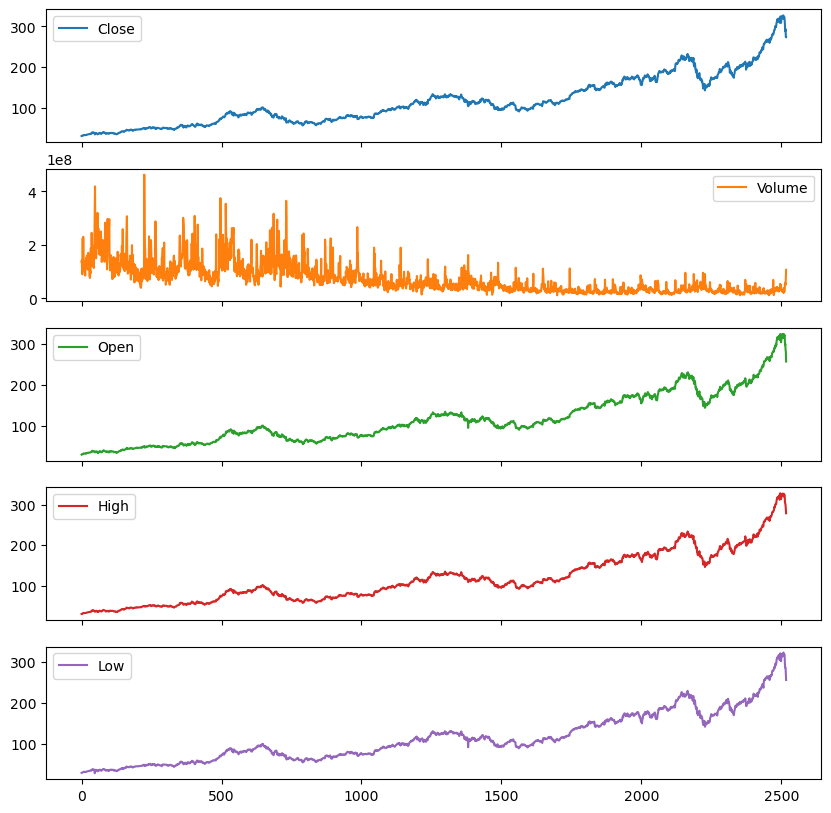

In [46]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [47]:
len = data.shape[0]
end = int(0.8 * len)
len

2518

In [58]:
newdata = data.iloc[:, 1]

In [59]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [60]:
T = 10

In [61]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [62]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [63]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2014, 10, 1) (2014, 1) (504, 10, 1) (504, 1)


In [64]:
N = X_train.shape[2]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

In [65]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [66]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [67]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
63/63 [==============================] - 5s 11ms/step - loss: 203.1460 - accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 1s 14ms/step - loss: 5.6513 - accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 4.4177 - accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 1s 17ms/step - loss: 4.5567 - accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 1s 20ms/step - loss: 4.8394 - accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 1s 11ms/step - loss: 3.8956 - accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 1s 14ms/step - loss: 4.5054 - accuracy: 0.0000e+00
Epoch 8/50
63/63 [==============================] - 1s 11ms/step - loss: 5.6260 - accuracy: 0.0000e+00
Epoch 9/50
63/63 [==============================] - 1s 11ms/step - loss: 6.8879 - accuracy: 0.0000e+00


In [68]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

16/16 [==============================] - 1s 6ms/step
[181.94623] [178.12]
[180.48132] [175.]
[177.86807] [176.21]
[175.05597] [176.82]
[175.2458] [176.67]
[175.67688] [175.03]
[175.07707] [176.94]
[175.00029] [179.98]
[176.69073] [181.72]
[179.30193] [179.97]
[181.5374] [178.44]
[179.60123] [178.65]
[177.68738] [178.02]
[177.3048] [175.3]
[176.02216] [175.24]
[174.85864] [171.27]
[172.94043] [168.85]
[171.16714] [164.94]
[168.38791] [172.77]
[172.42526] [168.34]
[170.81735] [166.48]
[167.99496] [167.78]
[167.59094] [166.68]
[167.08594] [168.39]
[167.3215] [171.61]
[168.72968] [172.8]
[171.36487] [168.38]
[172.50975] [170.05]
[169.07834] [173.25]
[170.07227] [172.44]
[172.66798] [174.14]
[173.03596] [174.73]
[174.07304] [175.82]
[174.88666] [178.24]
[176.25421] [177.84]
[178.8035] [172.8]
[177.80785] [165.72]
[170.03249] [165.24]
[167.50674] [162.94]
[166.14705] [163.65]
[166.40201] [164.22]
[166.46217] [162.32]
[164.5163] [165.26]
[165.13647] [169.1]
[166.596] [176.57]
[170.41074] [176

[318.59924] [320.3]
[318.75726] [313.05]
[315.39215] [298.18]
[307.5944] [288.08]
[297.19855] [292.65]
[299.44656] [273.52]
[274.4346] [273.36]


In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(predict_x, y_test)

0.9812459626873973

In [71]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [72]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,178.12,181.946228
1,175.00,180.481323
2,176.21,177.868073
3,176.82,175.055969
4,176.67,175.245804
...,...,...
499,298.18,315.392151
500,288.08,307.594391
501,292.65,297.198547
502,273.52,299.446564


<AxesSubplot:>

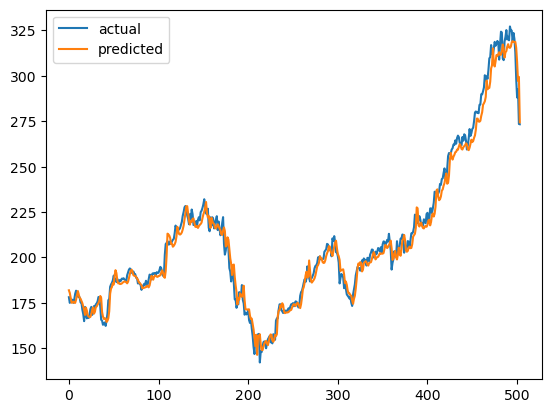

In [73]:
test.plot()

In [74]:
filename = 'model_pickle_apple_lstm.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-2

In [75]:
new = X_test[-1]
final = y_test[-1]
np.append(new, final)
new

array([[324.87],
       [324.95],
       [319.  ],
       [323.62],
       [320.3 ],
       [313.05],
       [298.18],
       [288.08],
       [292.65],
       [273.52]])

In [76]:
predictions = []
for i in range(50):
    fin = new.reshape(1, 10, 1)
    final = model.predict(fin)
    for j in final:
        new = np.append(new, j)
        predictions.append(j)
    new = new[1:]

1/1 [==============================] - 0s 66ms/step


In [77]:
predictions

[array([274.43466], dtype=float32),
 array([277.16568], dtype=float32),
 array([269.6235], dtype=float32),
 array([263.79068], dtype=float32),
 array([266.48938], dtype=float32),
 array([276.3282], dtype=float32),
 array([277.4721], dtype=float32),
 array([272.6163], dtype=float32),
 array([271.67563], dtype=float32),
 array([268.87656], dtype=float32),
 array([267.3432], dtype=float32),
 array([266.13693], dtype=float32),
 array([264.92563], dtype=float32),
 array([263.8858], dtype=float32),
 array([262.74194], dtype=float32),
 array([261.4173], dtype=float32),
 array([260.23456], dtype=float32),
 array([258.99442], dtype=float32),
 array([257.80502], dtype=float32),
 array([256.58905], dtype=float32),
 array([255.38097], dtype=float32),
 array([254.17265], dtype=float32),
 array([252.95882], dtype=float32),
 array([251.74783], dtype=float32),
 array([250.54324], dtype=float32),
 array([249.33842], dtype=float32),
 array([248.13875], dtype=float32),
 array([246.94202], dtype=float32),

In [78]:
x = [i+data['Close'].shape[0] for i in range(50)]

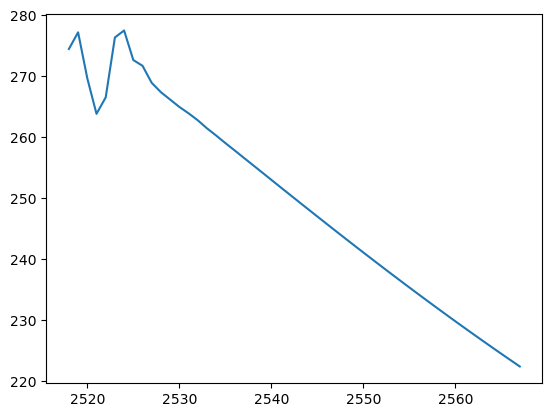

In [79]:
plt.plot(x,predictions)